Resolver los ejercicios 1, 3 y 4 de aprendizaje bayesiano utilizando árboles de decisión.Para cada caso responder:
¿Se logró una exactitud mayor que con aprendizaje bayesiano?
¿Cuál es la profundidad óptima del árbol?
¿Cuanta diferencia en la exactitud del resultado existe con los métodos de ganancia y gini?

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [2]:
dataframe = pd.read_csv("data/globos.csv", header=None)
dataframe.head()


,0,1,2,3,4
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,SMALL,DIP,CHILD,F


In [3]:
dataframe

,0,1,2,3,4
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,SMALL,DIP,CHILD,F
5,YELLOW,LARGE,STRETCH,ADULT,T
6,YELLOW,LARGE,STRETCH,CHILD,T
7,YELLOW,LARGE,DIP,ADULT,T
8,YELLOW,LARGE,DIP,CHILD,F
9,YELLOW,LARGE,DIP,CHILD,F


Renombramos las columnas numericas por strings acorde a cada columna:

In [4]:
dataframe.rename(columns={
    0: 'COLOR',
    1: 'SIZE',
    2: 'PROF',
    3: 'AGE',
    4: 'STATUS'
}, inplace=True)

class_names = list(np.unique(dataframe.values[:, 4]))
dataframe


,COLOR,SIZE,PROF,AGE,STATUS
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,T
2,YELLOW,SMALL,DIP,ADULT,T
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,SMALL,DIP,CHILD,F
5,YELLOW,LARGE,STRETCH,ADULT,T
6,YELLOW,LARGE,STRETCH,CHILD,T
7,YELLOW,LARGE,DIP,ADULT,T
8,YELLOW,LARGE,DIP,CHILD,F
9,YELLOW,LARGE,DIP,CHILD,F


In [5]:
dataframe = dataframe.apply(preprocessing.LabelEncoder().fit_transform)
dataframe

,COLOR,SIZE,PROF,AGE,STATUS
0,1,1,1,0,1
1,1,1,1,1,1
2,1,1,0,0,1
3,1,1,0,1,0
4,1,1,0,1,0
5,1,0,1,0,1
6,1,0,1,1,1
7,1,0,0,0,1
8,1,0,0,1,0
9,1,0,0,1,0


In [6]:
data = dataframe.values[:,:4]
data_columns = list(dataframe.columns.values[:4])

target=dataframe.values[:,4]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)
print(X_train)

[[1 1 0 1]
 [0 0 0 0]
 [1 0 0 0]
 [1 1 1 1]
 [0 1 0 1]
 [1 1 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [1 0 0 1]
 [0 0 1 0]
 [1 0 0 1]
 [0 1 0 0]
 [0 1 1 1]
 [1 0 1 0]]


In [8]:
classification = DecisionTreeClassifier(criterion="gini", max_depth=2)
classification = classification.fit(X_train,y_train)
y_pred = classification.predict(X_test)

In [9]:
error =metrics.mean_squared_error(y_test,y_pred)
print(error)

0.0


The accuracy is of:: 1.0


C:\Users\Gianca\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


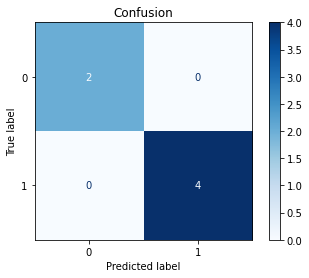

In [10]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"The accuracy is of:: {accuracy}")

disp = metrics.plot_confusion_matrix(classification, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion')

plt.show()

In [11]:
dot_data = StringIO()
export_graphviz(
    classification, 
    out_file=dot_data,
    filled=True, 
    rounded=True,
    special_characters=True,
    feature_names=data_columns,
    class_names=class_names
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found